In [1]:
pip install downcast


  Using cached downcast-0.0.8-py3-none-any.whl (3.3 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 2.7 MB/s eta 0:00:00
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
     ---------------------------------------- 7.4/7.4 MB 4.3 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install pandas

     ---------------------------------------- 10.9/10.9 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 500.8/500.8 KB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [7]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 KB 3.0 MB/s eta 0:00:00
     -------------------------------------- 960.8/960.8 KB 7.6 MB/s eta 0:00:00
     -------------------------------------- 162.0/162.0 KB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [11]:
pip install seaborn

     -------------------------------------- 285.1/285.1 KB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [12]:
pip install plotly

     ---------------------------------------- 15.2/15.2 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [14]:
pip install tqdm

     -------------------------------------- 78.5/78.5 KB 725.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import pickle
import numpy as np
from downcast import reduce
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
import random 
#from xgboost import XGBRegressor
#from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [3]:
def rmse(pred,value):
    return np.sqrt(((pred-value)**2).mean())

In [4]:
calendar_=pd.read_csv(r"\Users\Lenovo\Downloads\coursework_docs\Team_26_Developing_an_opinionated_sales_forecasting_MVP\calendar.csv")
sales_train_eval=pd.read_csv(r"\Users\Lenovo\Downloads\coursework_docs\Team_26_Developing_an_opinionated_sales_forecasting_MVP\sales_train_evaluation.csv")
sell_prices_=pd.read_csv(r"\Users\Lenovo\Downloads\coursework_docs\Team_26_Developing_an_opinionated_sales_forecasting_MVP\sell_prices.csv")

### ML Models

In [5]:
with open('C:/Users/Lenovo/Downloads/coursework_docs/Team_26_Developing_an_opinionated_sales_forecasting_MVP/data_final.pkl','rb') as f:
     data_final=pickle.load(f)

In [6]:
data_final.shape

(59181090, 36)

In [7]:
df=data_final[data_final['day']>1000]

In [9]:
df.shape

(28691090, 36)

In [10]:
l=[]
for i in range(1886,1914):
  l.append(i)

#https://www.kite.com/python/answers/how-to-select-rows-by-multiple-label-conditions-with-pandas-loc-in-python
x_train=df.loc[df['day']<=1885]
x_valid=df.loc[df['day'].isin(l)]
x_test=df.loc[df['day']>=1914]

y_train=x_train['demand']
y_valid=x_valid['demand']
y_test=x_test['demand']

x_train=x_train.drop(['demand'],axis=1)
x_valid=x_valid.drop(['demand'],axis=1)
x_test=x_test.drop(['demand'],axis=1)

print("x_train {}".format(x_train.shape),"  y_train {}".format(y_train.shape))
print("\nx_valid {}".format(x_valid.shape),"  y_valid {}".format(y_valid.shape))
print("\nx_test {}".format(x_test.shape),"  y_test {}".format(y_test.shape))

x_train (26983650, 35)   y_train (26983650,)

x_valid (853720, 35)   y_valid (853720,)

x_test (853720, 35)   y_test (853720,)


Quantile regression  will allow us to create a model that estimates the values ​​of the target variable (quantiles) at the given quantiles, in our case quantiles = (.5, .67, .95, .99). Knowing the values ​​of the objective variable within these quantiles will allow us to estimate the distribution of the objective variable. as such we will be able to evaluate the uncertainty of the estimate.

The difference between the common regression and quantile regression is the loss function.

### Implementing quantile regression in LightGBM

1.specify quantile for objective and quantile for alpha to get quantile regression
2.build a model for each quantile.

In [24]:
params = dict(objective='quantile', max_depth=5, num_leaves=25, n_estimators=200, n_jobs=4)
quantiles = (.5, .67, .95, .99)
w = 0.1

qr_models = []
for q in quantiles:
    print(f'\n----<quantile point {q}>----')
    mdl = LGBMRegressor(alpha=q, **params)
    mdl.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=10, verbose=20)
    qr_models.append(mdl)


----<quantile point 0.5>----
[20]	valid_0's quantile: 0.414875
[40]	valid_0's quantile: 0.39549
[60]	valid_0's quantile: 0.390958
[80]	valid_0's quantile: 0.388701

----<quantile point 0.67>----
[20]	valid_0's quantile: 0.441026
[40]	valid_0's quantile: 0.422409
[60]	valid_0's quantile: 0.418447
[80]	valid_0's quantile: 0.417538
[100]	valid_0's quantile: 0.416795
[120]	valid_0's quantile: 0.416619
[140]	valid_0's quantile: 0.416607
[160]	valid_0's quantile: 0.416605
[180]	valid_0's quantile: 0.416605
[200]	valid_0's quantile: 0.416605

----<quantile point 0.95>----
[20]	valid_0's quantile: 0.194317
[40]	valid_0's quantile: 0.188399
[60]	valid_0's quantile: 0.187253
[80]	valid_0's quantile: 0.187018

----<quantile point 0.99>----
[20]	valid_0's quantile: 0.0732777
[40]	valid_0's quantile: 0.0637794
[60]	valid_0's quantile: 0.0631703
[80]	valid_0's quantile: 0.0629925
[100]	valid_0's quantile: 0.0626517
[120]	valid_0's quantile: 0.0625532
[140]	valid_0's quantile: 0.0624628


In [28]:
with open('C:/Users/Lenovo/Downloads/coursework_docs/Team_26_Developing_an_opinionated_sales_forecasting_MVP/LightGBM_model.pkl','wb') as f:
     pickle.dump(mdl,f)

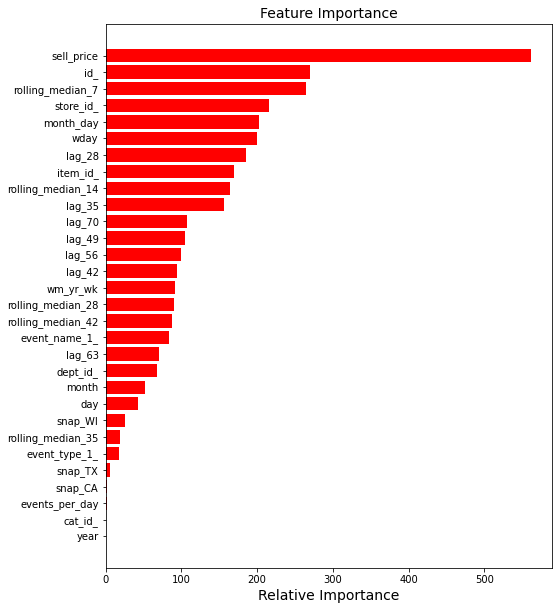

In [29]:
features=x_train.columns
imp=mdl.feature_importances_
indices=(np.argsort(imp))[5:]
plt.figure(figsize=(8,10))
plt.title('Feature Importance',fontsize=14)
plt.barh(range(len(indices)),imp[indices],color='r')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance',fontsize=14)
plt.show()

In [31]:
s1=pd.DataFrame()
s2=pd.DataFrame()
#test dataset(from 1914 to 1941 days) present in sales_train_evaluation only thats why sales_train_evaluation choosen
s1 =sales_train_eval[['id','item_id','store_id','cat_id']]
j=1
for i in range(1914,1942):
  s1['F'+str(j)]=mdl.predict(x_test[x_test['day']==(i)]) 
  j+=1
s1["id"]=s1["id"].apply(lambda x: x.replace('evaluation','validation'))
s2=s1.copy()
s2["id"]=s1["id"].apply(lambda x: x.replace('validation','evaluation'))
submit_LGBM_Regressor_=pd.concat([s1,s2]).reset_index().drop(['index'],axis=1)

In [32]:
submit_LGBM_Regressor_.head()

,id,item_id,store_id,cat_id,F1,F2,F3,F4,F5,F6,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,CA_1,HOBBIES,4.638920,4.038897,3.832522,3.750736,4.310737,5.237262,...,5.902490,6.416455,6.379969,4.207841,4.051061,3.870337,4.071100,5.065421,4.867546,5.015483
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,CA_1,HOBBIES,2.395023,2.042970,1.938218,2.348365,2.275549,2.812903,...,2.289665,2.645873,2.638114,2.238414,3.301445,3.233280,3.322169,3.542068,2.541350,2.428666
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,CA_1,HOBBIES,4.221759,4.056666,4.286257,4.294233,4.496605,6.388648,...,4.924362,5.830618,4.736300,3.672186,3.615478,3.115136,4.211151,4.537111,3.931744,4.259338
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,CA_1,HOBBIES,5.575560,4.645251,4.726084,6.084218,6.898871,7.466278,...,4.957885,6.208259,7.262963,5.265394,4.310225,4.428358,4.880145,5.138152,7.259722,7.508361
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,CA_1,HOBBIES,5.910583,5.886855,5.814237,6.430884,6.045559,5.925956,...,6.968864,8.197124,8.312674,6.691886,5.778239,5.720941,5.688657,6.119880,7.319575,6.842683


In [34]:
submit_LGBM_Regressor_.to_csv("C:/Users/Lenovo/Downloads/coursework_docs/Team_26_Developing_an_opinionated_sales_forecasting_MVP/submit_LGBM_Regressor_.csv",index=False)

In [25]:
#Predicted value of quantile
tr_pred_qps = []
for mdl in qr_models:
    tr_pred_qps.append(mdl.predict(x_train))

ts_pred_qps = []
for mdl in qr_models:
    ts_pred_qps.append(mdl.predict(x_test))

#Calculate mean and standard deviation of predicted values
def calc_ave_std(pred_quantile_points):
    pred_ave = np.zeros_like(pred_quantile_points[0])
    for pred in pred_quantile_points:
        pred_ave += w * pred

    pred_std = np.zeros_like(pred_quantile_points[0])
    for pred in pred_quantile_points:
        pred_std += w * (pred - pred_ave) ** 2
    pred_std = np.sqrt(pred_std)

    return pred_ave, pred_std

In [26]:
tr_pred_ave, tr_pred_std = calc_ave_std(tr_pred_qps)
ts_pred_ave, ts_pred_std = calc_ave_std(ts_pred_qps)

we visualize our estimates within the highest and lowest quantiles.

train
test


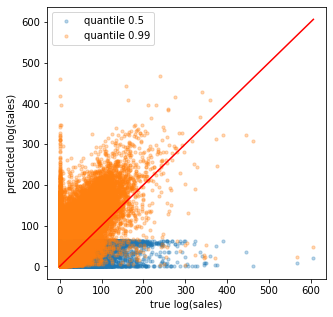

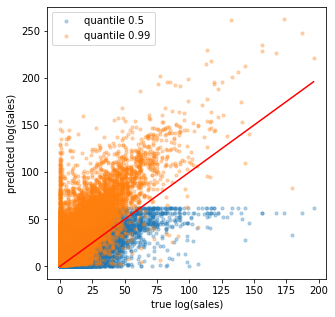

In [27]:
def plot_true_vs_pred(y_true, pred_list, labels):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))

    for pred, lbl in zip(pred_list, labels):
        ax.scatter(y_true, pred, label=lbl, s=10, alpha=0.3)
    ax.plot([np.min(y_true), np.max(y_true)], [np.min(y_true), np.max(y_true)], ls='-', c='r')

    ax.set_xlabel('true log(sales)')
    ax.set_ylabel('predicted log(sales)')
    ax.legend()
    fig.show()

print('train')
plot_true_vs_pred(y_train, 
                  [tr_pred_qps[0], tr_pred_qps[3]],
                  [f'quantile {quantiles[0]}', f'quantile {quantiles[3]}'])

print('test')
plot_true_vs_pred(y_test, 
                  [ts_pred_qps[0], ts_pred_qps[3]],
                  [f'quantile {quantiles[0]}', f'quantile {quantiles[3]}'])

for quantiles that are well estimated, the estimates are small for the small quantiles and large for the large quantiles.

looks good. We notice, the larger the quantile, the larger the estimate. However, there are some cases where this is not the case which may mean there could be some error.

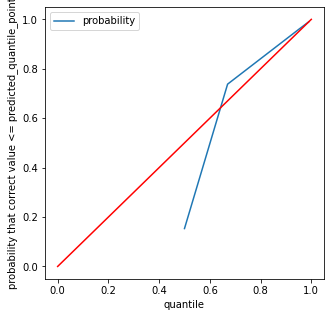

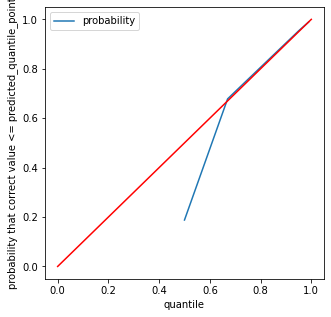

In [36]:
def plot_proba_less_than_quantile_point(quantiles, y_true, pred_list):
    proba = []
    for pred in pred_list:
        prb = np.sum(y_true < pred) / len(y_true)
        proba.append(prb)

    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    ax.plot(quantiles, proba, label='probability')
    ax.plot([0, 1], [0, 1], ls='-', c='r')

    ax.set_xlabel('quantile')
    ax.set_ylabel('probability that correct value <= predicted_quantile_point')
    ax.legend()
    fig.show()

plot_proba_less_than_quantile_point(quantiles, y_train, tr_pred_qps)
plot_proba_less_than_quantile_point(quantiles, y_test, ts_pred_qps)

### tuning the model

In [12]:

params = dict(objective='quantile',learning_rate=0.034, max_depth=66, num_leaves=224, n_estimators=200, n_jobs=4)
quantiles = (.5, .67, .95, .99)
w = 0.1

q_models = []
for q in quantiles:
    print(f'\n----<quantile point {q}>----')
    model = LGBMRegressor(alpha=q, **params)
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=10, verbose=20)
    q_models.append(model)


----<quantile point 0.5>----
[20]	valid_0's quantile: 0.505647
[40]	valid_0's quantile: 0.432765
[60]	valid_0's quantile: 0.404319
[80]	valid_0's quantile: 0.39424
[100]	valid_0's quantile: 0.389824
[120]	valid_0's quantile: 0.387789
[140]	valid_0's quantile: 0.386541
[160]	valid_0's quantile: 0.385949
[180]	valid_0's quantile: 0.385646
[200]	valid_0's quantile: 0.385525

----<quantile point 0.67>----
[20]	valid_0's quantile: 0.565597
[40]	valid_0's quantile: 0.467939
[60]	valid_0's quantile: 0.433774
[80]	valid_0's quantile: 0.421416
[100]	valid_0's quantile: 0.416332
[120]	valid_0's quantile: 0.414146
[140]	valid_0's quantile: 0.413069
[160]	valid_0's quantile: 0.412601
[180]	valid_0's quantile: 0.412368
[200]	valid_0's quantile: 0.412266

----<quantile point 0.95>----
[20]	valid_0's quantile: 0.255835
[40]	valid_0's quantile: 0.20274
[60]	valid_0's quantile: 0.190864
[80]	valid_0's quantile: 0.18775
[100]	valid_0's quantile: 0.186595
[120]	valid_0's quantile: 0.186069
[140]	valid_0

In [ ]:
def plot_error(y_true, pred_ave, pred_std):
    fig, axs = plt.subplots(1, 3, figsize=(15,5))

    ax = axs[0]
    ax.scatter(y_true, pred_ave, s=10, label='predicted average')
    ax.plot([np.min(y_true), np.max(y_true)], [np.min(y_true), np.max(y_true)], ls='-', c='r')
    ax.set_xlabel('true log(sales)')
    ax.set_ylabel('predicted log(sales)')
    ax.legend()

    ax = axs[1]
    ax.scatter(y_true, pred_std, s=10, label='predicted std')
    ax.set_xlabel('true log(sales)')
    ax.set_ylabel('predicted std of log(sales)')
    ax.legend()

    ax = axs[2]
    ax.scatter(pred_std, y_true - pred_ave, s=10)
    ax.set_xlabel('predicted std')
    ax.set_ylabel('true - predict of log(sales)')

    fig.show()

plot_error(y_train, tr_pred_ave, tr_pred_std)
plot_error(y_test, ts_pred_ave, ts_pred_std)